In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

In [2]:
path_AE_metrics = "../../Results/AE_tif_mixed_bright/metrics_AE.csv"
path_image_info = "../../Results/AE_tif_mixed_bright/image_list.csv"

In [3]:
AE_metrics = pd.read_csv(path_AE_metrics, index_col=0)
list_images = pd.read_csv(path_image_info, index_col=0)

In [4]:
AE_metrics.head(3)

,normalization,standardization,image_type,channel_image,image_resize_x,image_resize_y,Image_path,autoencoder_name,prediction_interation,prediction_size,...,gini_latent_space,kurtois_latent_space,entropy_latent_space,mean_activation_latent_space,MSE_compared_to_start,latent_distance_to_start,SSIM_compared_to_start,MSE_compared_to_previous_step,latent_distance_to_previous_step,SSIM_compared_to_previous_step
0,True,True,RGB,ALL,NaN,NaN,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,ConvolutionnalModelTrained_Bedrock240_LD6_pred...,0.0,128.0,...,0.208666,-0.290257,-inf,-0.062343,0.000817,0.001623,0.0,0.000817,0.001623,0.0
1,True,True,RGB,ALL,NaN,NaN,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,ConvolutionnalModelTrained_Bedrock240_LD6_pred...,1.0,128.0,...,0.237757,-0.495719,-inf,-0.082150,0.001837,0.006039,0.0,0.000364,0.001481,0.0
2,True,True,RGB,ALL,NaN,NaN,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,ConvolutionnalModelTrained_Bedrock240_LD6_pred...,2.0,128.0,...,0.249531,-0.607644,-inf,-0.101951,0.003533,0.013641,0.0,0.000374,0.001622,0.0


In [5]:
list_images.head(3)

,Image_path,filename,type,folder,habitat,color_control,tv_loss,layers,sex,fish_n,species,img_width,img_height,image_extension
0,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,F,2.0,punctulatum,6543,2213,.jpg
1,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_TUQU_M01.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,M,1.0,punctulatum,6352,2140,.jpg
2,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F04.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,F,4.0,punctulatum,6662,2078,.jpg


In [6]:
merged = list_images.merge(AE_metrics, on=["Image_path"], how='inner')
merged.head(3)

,Image_path,filename,type,folder,habitat,color_control,tv_loss,layers,sex,fish_n,...,gini_latent_space,kurtois_latent_space,entropy_latent_space,mean_activation_latent_space,MSE_compared_to_start,latent_distance_to_start,SSIM_compared_to_start,MSE_compared_to_previous_step,latent_distance_to_previous_step,SSIM_compared_to_previous_step
0,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,F,2.0,...,0.208666,-0.290257,-inf,-0.062343,0.000817,0.001623,0.0,0.000817,0.001623,0.0
1,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,F,2.0,...,0.237757,-0.495719,-inf,-0.082150,0.001837,0.006039,0.0,0.000364,0.001481,0.0
2,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,F,2.0,...,0.249531,-0.607644,-inf,-0.101951,0.003533,0.013641,0.0,0.000374,0.001622,0.0


In [7]:
print(merged.columns)

Index(['Image_path', 'filename', 'type', 'folder', 'habitat', 'color_control',
       'tv_loss', 'layers', 'sex', 'fish_n', 'species', 'img_width',
       'img_height', 'image_extension', 'normalization', 'standardization',
       'image_type', 'channel_image', 'image_resize_x', 'image_resize_y',
       'autoencoder_name', 'prediction_interation', 'prediction_size',
       'gini_pxl_space', 'kurtois_pxl_space', 'entropy_pxl_space',
       'gini_latent_space', 'kurtois_latent_space', 'entropy_latent_space',
       'mean_activation_latent_space', 'MSE_compared_to_start',
       'latent_distance_to_start', 'SSIM_compared_to_start',
       'MSE_compared_to_previous_step', 'latent_distance_to_previous_step',
       'SSIM_compared_to_previous_step'],
      dtype='object')


ValueError: There must be exactly two hue levels to use `split`.'

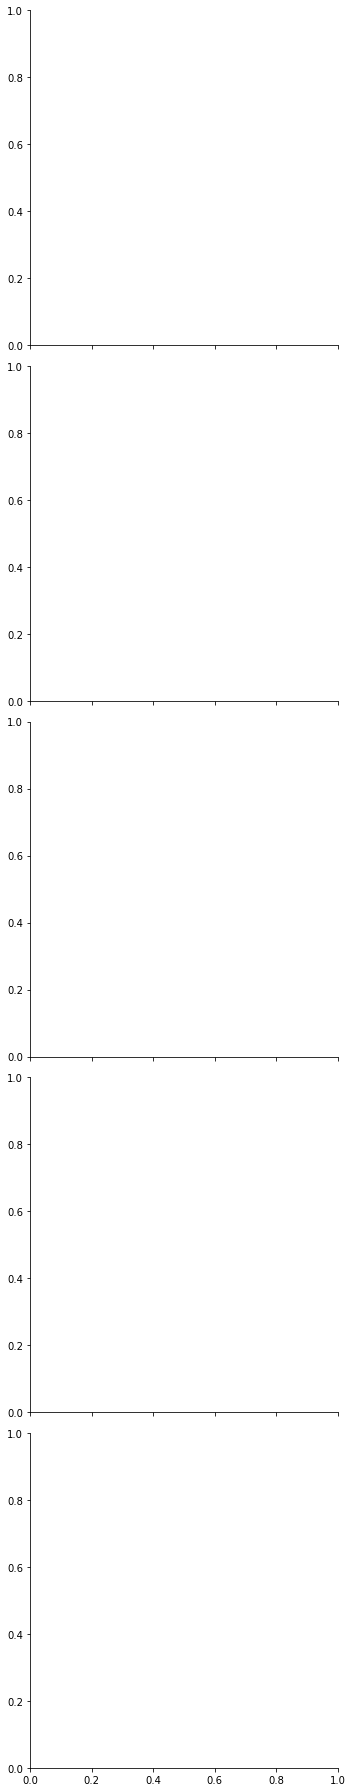

In [8]:
f=sns.catplot(data=merged.loc[merged["prediction_interation"]==0], 
            x="species", hue="sex", split=True, 
            y="gini_latent_space", row="autoencoder_name", kind="violin")


In [ ]:
merged.drop("0")

In [ ]:
%matplotlib inline
f=sns.relplot(data=merged.loc[merged["prediction_interation"]==0], 
            x="habitat", y="mean_activation_latent_space", hue="autoencoder_name")

In [ ]:
%matplotlib inline
f=sns.relplot(data=merged.loc[merged["prediction_interation"]==0], 
            x="habitat", y="gini_latent_space", hue="autoencoder_name")

In [ ]:
f=sns.relplot(data=merged.loc[merged["prediction_interation"]==0], 
            x="habitat", y="kurtois_latent_space", hue="autoencoder_name")

In [ ]:
f=sns.relplot(data=merged.loc[merged["prediction_interation"]==0], 
            x="habitat", y="MSE_compared_to_start", hue="autoencoder_name")

In [9]:
data = merged.loc[merged["prediction_interation"]==0][['Image_path', 'filename', 
       'folder', 'habitat',
       'sex', 'fish_n', 'species',
       'autoencoder_name',
       'gini_latent_space', 'kurtois_latent_space',
       'mean_activation_latent_space', 'MSE_compared_to_start',
       'latent_distance_to_start']]
data.head()

,Image_path,filename,folder,habitat,sex,fish_n,species,autoencoder_name,gini_latent_space,kurtois_latent_space,mean_activation_latent_space,MSE_compared_to_start,latent_distance_to_start
0,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,punctulatum,not_listed,F,2.0,punctulatum,ConvolutionnalModelTrained_Bedrock240_LD6_pred...,0.208666,-0.290257,-0.062343,0.000817,0.001623
50,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,punctulatum,not_listed,F,2.0,punctulatum,ConvolutionnalModelTrained_Boulder240_LD6_pred...,0.181361,-0.093098,-0.123126,0.000794,0.000655
100,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,punctulatum,not_listed,F,2.0,punctulatum,ConvolutionnalModelTrained_Detritus240_LD6_pre...,0.134489,-0.663062,0.022757,0.001005,0.001702
150,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,punctulatum,not_listed,F,2.0,punctulatum,ConvolutionnalModelTrained_Gravel240_LD6_pred1...,0.217178,-1.149850,-0.007306,0.001289,0.001415
200,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,punctulatum,not_listed,F,2.0,punctulatum,ConvolutionnalModelTrained_Sand240_LD6_pred128...,0.197397,-0.419902,0.030701,0.000631,0.000756


In [10]:
one_hot_data = pd.get_dummies(data.drop(columns=["filename", "folder"]), columns=["habitat", "sex"])
one_hot_data = one_hot_data.drop(columns=["sex_F", "sex_0"])
one_hot_data.head()

,Image_path,fish_n,species,autoencoder_name,gini_latent_space,kurtois_latent_space,mean_activation_latent_space,MSE_compared_to_start,latent_distance_to_start,habitat_bedrock,habitat_boulder,habitat_detritus,habitat_gravel,habitat_not_listed,habitat_sand,sex_M
0,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Bedrock240_LD6_pred...,0.208666,-0.290257,-0.062343,0.000817,0.001623,0,0,0,0,1,0,0
50,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Boulder240_LD6_pred...,0.181361,-0.093098,-0.123126,0.000794,0.000655,0,0,0,0,1,0,0
100,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Detritus240_LD6_pre...,0.134489,-0.663062,0.022757,0.001005,0.001702,0,0,0,0,1,0,0
150,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Gravel240_LD6_pred1...,0.217178,-1.149850,-0.007306,0.001289,0.001415,0,0,0,0,1,0,0
200,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Sand240_LD6_pred128...,0.197397,-0.419902,0.030701,0.000631,0.000756,0,0,0,0,1,0,0


In [11]:
columns_numbers=[
       'gini_latent_space', 'kurtois_latent_space',
       'mean_activation_latent_space', 'MSE_compared_to_start',
       'latent_distance_to_start']
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = one_hot_data.copy()
data_scaled[columns_numbers] = min_max_scaler.fit_transform(data_scaled[columns_numbers])
data_scaled.head()

,Image_path,fish_n,species,autoencoder_name,gini_latent_space,kurtois_latent_space,mean_activation_latent_space,MSE_compared_to_start,latent_distance_to_start,habitat_bedrock,habitat_boulder,habitat_detritus,habitat_gravel,habitat_not_listed,habitat_sand,sex_M
0,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Bedrock240_LD6_pred...,0.412083,0.173773,0.481855,0.100320,0.092795,0,0,0,0,1,0,0
50,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Boulder240_LD6_pred...,0.325300,0.198763,0.393475,0.097182,0.032795,0,0,0,0,1,0,0
100,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Detritus240_LD6_pre...,0.176324,0.126519,0.605590,0.126540,0.097728,0,0,0,0,1,0,0
150,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Gravel240_LD6_pred1...,0.439138,0.064819,0.561877,0.166143,0.079885,0,0,0,0,1,0,0
200,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Sand240_LD6_pred128...,0.376269,0.157340,0.617140,0.074422,0.039054,0,0,0,0,1,0,0


<AxesSubplot:>

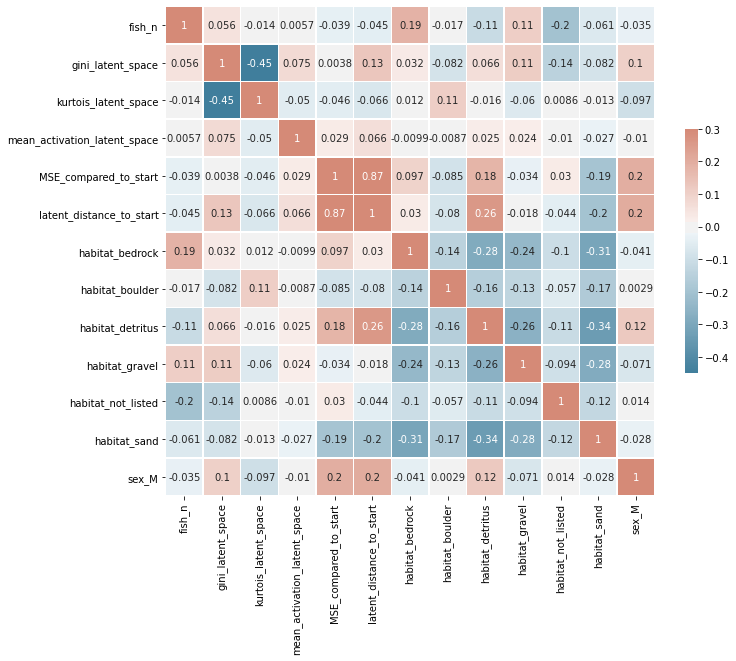

In [12]:
f, ax = plt.subplots(figsize=(11, 9))
corr = data_scaled.corr()
#custom colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

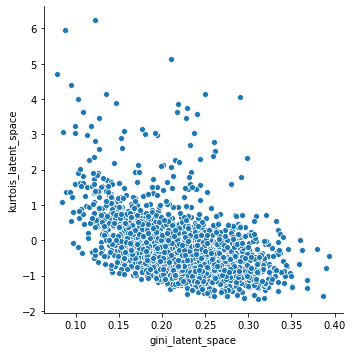

In [22]:
sns.relplot(data=data, x="gini_latent_space", y="kurtois_latent_space")
plt.show()

Is the mse from a prediction correlated to the habitat?

In [13]:
min_max_scaler2 = preprocessing.MinMaxScaler()
data_scaled = data[["Image_path","habitat","autoencoder_name", *columns_numbers]].copy()
data_scaled[columns_numbers] = min_max_scaler2.fit_transform(data_scaled[columns_numbers])
data_scaled.head()

,Image_path,habitat,autoencoder_name,gini_latent_space,kurtois_latent_space,mean_activation_latent_space,MSE_compared_to_start,latent_distance_to_start
0,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,not_listed,ConvolutionnalModelTrained_Bedrock240_LD6_pred...,0.412083,0.173773,0.481855,0.100320,0.092795
50,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,not_listed,ConvolutionnalModelTrained_Boulder240_LD6_pred...,0.325300,0.198763,0.393475,0.097182,0.032795
100,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,not_listed,ConvolutionnalModelTrained_Detritus240_LD6_pre...,0.176324,0.126519,0.605590,0.126540,0.097728
150,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,not_listed,ConvolutionnalModelTrained_Gravel240_LD6_pred1...,0.439138,0.064819,0.561877,0.166143,0.079885
200,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,not_listed,ConvolutionnalModelTrained_Sand240_LD6_pred128...,0.376269,0.157340,0.617140,0.074422,0.039054


In [14]:
col_mse="gini_latent_space"
habitats=["sand", "boulder", "bedrock", "detritus", "gravel"]

for hab in habitats:
    data_hab = data_scaled[data_scaled["habitat"]==hab][["habitat", "autoencoder_name", col_mse]]
    mean_grps = data_hab.groupby("autoencoder_name").mean()
    print("\n",hab)
    print(mean_grps)


 sand
                                                    gini_latent_space
autoencoder_name                                                     
ConvolutionnalModelTrained_Bedrock240_LD6_pred1...           0.512139
ConvolutionnalModelTrained_Boulder240_LD6_pred1...           0.325940
ConvolutionnalModelTrained_Detritus240_LD6_pred...           0.343023
ConvolutionnalModelTrained_Gravel240_LD6_pred12...           0.402956
ConvolutionnalModelTrained_Sand240_LD6_pred128x...           0.471545

 boulder
                                                    gini_latent_space
autoencoder_name                                                     
ConvolutionnalModelTrained_Bedrock240_LD6_pred1...           0.503005
ConvolutionnalModelTrained_Boulder240_LD6_pred1...           0.327980
ConvolutionnalModelTrained_Detritus240_LD6_pred...           0.381050
ConvolutionnalModelTrained_Gravel240_LD6_pred12...           0.316728
ConvolutionnalModelTrained_Sand240_LD6_pred128x...           0.396049

 b

In [15]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [16]:
columns_params=[
       'gini_latent_space', 'kurtois_latent_space',
       'mean_activation_latent_space', 'MSE_compared_to_start',
       'latent_distance_to_start']

X = data_scaled.pivot(index=["Image_path"], columns=["autoencoder_name"], values=columns_params)
X.columns = ["_".join(map(str, col )) if isinstance(col, tuple) else col for col in X.columns]

#y = pd.get_dummies(data_scaled[["habitat","Image_path"]], columns=["habitat"]).drop_duplicates()
y = data_scaled[["habitat","Image_path"]].drop_duplicates()

my_data = X.merge(y,how="left", on="Image_path")
my_data.head()

train, test = train_test_split(my_data.drop('Image_path', axis=1), test_size=0.2)

X_train = train[X.columns]
X_test = test[X.columns]

y_train = train.drop(X.columns, axis=1)
y_test = test.drop(X.columns, axis=1)

train.head()

,gini_latent_space_ConvolutionnalModelTrained_Bedrock240_LD6_pred128x128x3,gini_latent_space_ConvolutionnalModelTrained_Boulder240_LD6_pred128x128x3,gini_latent_space_ConvolutionnalModelTrained_Detritus240_LD6_pred128x128x3,gini_latent_space_ConvolutionnalModelTrained_Gravel240_LD6_pred128x128x3,gini_latent_space_ConvolutionnalModelTrained_Sand240_LD6_pred128x128x3,kurtois_latent_space_ConvolutionnalModelTrained_Bedrock240_LD6_pred128x128x3,kurtois_latent_space_ConvolutionnalModelTrained_Boulder240_LD6_pred128x128x3,kurtois_latent_space_ConvolutionnalModelTrained_Detritus240_LD6_pred128x128x3,kurtois_latent_space_ConvolutionnalModelTrained_Gravel240_LD6_pred128x128x3,kurtois_latent_space_ConvolutionnalModelTrained_Sand240_LD6_pred128x128x3,...,MSE_compared_to_start_ConvolutionnalModelTrained_Boulder240_LD6_pred128x128x3,MSE_compared_to_start_ConvolutionnalModelTrained_Detritus240_LD6_pred128x128x3,MSE_compared_to_start_ConvolutionnalModelTrained_Gravel240_LD6_pred128x128x3,MSE_compared_to_start_ConvolutionnalModelTrained_Sand240_LD6_pred128x128x3,latent_distance_to_start_ConvolutionnalModelTrained_Bedrock240_LD6_pred128x128x3,latent_distance_to_start_ConvolutionnalModelTrained_Boulder240_LD6_pred128x128x3,latent_distance_to_start_ConvolutionnalModelTrained_Detritus240_LD6_pred128x128x3,latent_distance_to_start_ConvolutionnalModelTrained_Gravel240_LD6_pred128x128x3,latent_distance_to_start_ConvolutionnalModelTrained_Sand240_LD6_pred128x128x3,habitat
209,0.697195,0.404589,0.397784,0.331287,0.422141,0.507300,0.341941,0.277282,0.229811,0.290280,...,0.089674,0.074898,0.147606,0.061579,0.101046,0.055549,0.061464,0.125509,0.047081,sand
6,0.138343,0.028227,0.182004,0.065807,0.135051,1.000000,0.965538,0.393605,0.594555,0.429685,...,0.107929,0.102883,0.143267,0.081516,0.064506,0.035596,0.067299,0.052037,0.048997,bedrock
149,0.405805,0.258684,0.301190,0.368906,0.364040,0.156485,0.174816,0.205591,0.101320,0.173145,...,0.072419,0.076411,0.100612,0.054345,0.050317,0.025397,0.054772,0.039366,0.030445,sand
91,0.509333,0.281482,0.298850,0.244990,0.284165,0.394224,0.327179,0.181701,0.144165,0.246638,...,0.090309,0.107527,0.151674,0.071691,0.080334,0.028656,0.071483,0.074951,0.036410,gravel
362,0.758212,0.892612,0.747220,0.686997,0.854610,0.120771,0.210124,0.052701,0.003548,0.091396,...,0.048999,0.043347,0.126138,0.035761,0.131569,0.070273,0.072575,0.224345,0.051308,gravel


In [17]:
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train, y_train.values.ravel())
y_pred = neigh.predict(X_test)
print(neigh.score(X_train, y_train))
print(neigh.score(X_test, y_test))

0.6850152905198776
0.6097560975609756


In [18]:
reg = LogisticRegression().fit(X_train, y_train.values.ravel())
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.5382262996941896
0.573170731707317


In [19]:
SVM = svm.SVC()
SVM.fit(X_train, y_train.values.ravel())
print("score: ",SVM.score(X_test,y_test))
y_pred = SVM.predict(X_test)
print("confusion matrix: \n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

score:  0.5853658536585366
confusion matrix: 
 [[13  0  0  0  0  5]
 [ 0  1  1  0  0  1]
 [ 0  0 12  2  0  6]
 [ 3  0  6  3  0  1]
 [ 1  0  0  1  0  1]
 [ 2  0  4  0  0 19]]
              precision    recall  f1-score   support

     bedrock       0.68      0.72      0.70        18
     boulder       1.00      0.33      0.50         3
    detritus       0.52      0.60      0.56        20
      gravel       0.50      0.23      0.32        13
  not_listed       0.00      0.00      0.00         3
        sand       0.58      0.76      0.66        25

    accuracy                           0.59        82
   macro avg       0.55      0.44      0.46        82
weighted avg       0.57      0.59      0.56        82



C:\Users\alexd\Anaconda3\envs\cefe\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexd\Anaconda3\envs\cefe\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexd\Anaconda3\envs\cefe\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_train, y_train)
RF.predict(X_test)
round(RF.score(X_test, y_test), 4)

C:\Users\alexd\Anaconda3\envs\cefe\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.6951